In [1]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 26.5 MB/s 


In [141]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates

from sklearn import linear_model
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense
import keras. backend as K
from keras. callbacks import EarlyStopping

from keras. models import load_model
from keras. layers import LSTM
from keras. utils.vis_utils import plot_model


In [142]:
data = pd.read_csv("Exam_Data.xlsx - Predictor.csv")

In [143]:
data.shape

(23040, 18)

In [144]:
data.dtypes

Date                    object
Target                 float64
Hour                     int64
Period_In_Hour           int64
Week_Day                 int64
Is_Working_Day           int64
Previous_Point         float64
Previous_Hour_Price    float64
P24HA_Price            float64
PDSH_Price             float64
PWSH_Price             float64
PWA_Price              float64
Price_HAP              float64
Price_DAP              float64
Load                   float64
Load_HAP               float64
Load_DAP               float64
Sgn0_Volume_Dir        float64
dtype: object

In [145]:
data.isna().sum()

Date                       0
Target                     0
Hour                       0
Period_In_Hour             0
Week_Day                   0
Is_Working_Day             0
Previous_Point           160
Previous_Hour_Price       12
P24HA_Price               24
PDSH_Price               288
PWSH_Price              2016
PWA_Price               2016
Price_HAP                  0
Price_DAP              21228
Load                     290
Load_HAP                   0
Load_DAP               21120
Sgn0_Volume_Dir           71
dtype: int64

In [146]:
data.head()

,Date,Target,Hour,Period_In_Hour,Week_Day,Is_Working_Day,Previous_Point,Previous_Hour_Price,P24HA_Price,PDSH_Price,PWSH_Price,PWA_Price,Price_HAP,Price_DAP,Load,Load_HAP,Load_DAP,Sgn0_Volume_Dir
0,8/1/21 0:00,3312.86300,1,1,6,2,NaN,NaN,NaN,NaN,NaN,NaN,15395.51435,NaN,8226.80,8313.50,8009.44,NaN
1,8/1/21 0:05,21185.46580,1,2,6,2,3312.86300,NaN,NaN,NaN,NaN,NaN,13294.48275,NaN,8322.14,8258.65,NaN,NaN
2,8/1/21 0:10,15381.50925,1,3,6,2,21185.46580,NaN,NaN,NaN,NaN,NaN,13290.43905,NaN,8270.98,8225.63,NaN,NaN
3,8/1/21 0:15,13280.22700,1,4,6,2,15381.50925,NaN,NaN,NaN,NaN,NaN,12057.52935,NaN,8222.24,8200.11,NaN,NaN
4,8/1/21 0:20,7834.12600,1,5,6,2,13280.22700,NaN,NaN,NaN,NaN,NaN,3307.37600,NaN,8145.20,8144.68,NaN,NaN


In [147]:

# on our data, impute the missing values using the interpolation techniques and specifically, the lineare method
data['Previous_Point']= data['Previous_Point'].fillna(method ='bfill')
data['P24HA_Price']= data['P24HA_Price'].fillna(method ='bfill')
data['PDSH_Price']= data['PDSH_Price'].fillna(method ='bfill')
data['PWA_Price']= data['PWA_Price'].fillna(method ='bfill')
data['Load']= data['Load'].fillna(method ='bfill')
data['Sgn0_Volume_Dir']= data['Sgn0_Volume_Dir'].fillna(method ='bfill')
data['Previous_Hour_Price']= data['Previous_Hour_Price'].fillna(method ='bfill')









In [148]:
data.isna().sum()

Date                       0
Target                     0
Hour                       0
Period_In_Hour             0
Week_Day                   0
Is_Working_Day             0
Previous_Point             0
Previous_Hour_Price        0
P24HA_Price                0
PDSH_Price                 0
PWSH_Price              2016
PWA_Price                  0
Price_HAP                  0
Price_DAP              21228
Load                       0
Load_HAP                   0
Load_DAP               21120
Sgn0_Volume_Dir            0
dtype: int64

In [149]:
data.drop(["Load_DAP","Price_DAP","PWSH_Price"],axis = 1 , inplace = True)

In [150]:
data.isna().sum()

Date                   0
Target                 0
Hour                   0
Period_In_Hour         0
Week_Day               0
Is_Working_Day         0
Previous_Point         0
Previous_Hour_Price    0
P24HA_Price            0
PDSH_Price             0
PWA_Price              0
Price_HAP              0
Load                   0
Load_HAP               0
Sgn0_Volume_Dir        0
dtype: int64

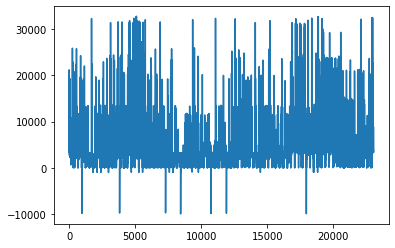

In [151]:
data["Target"].plot()

In [152]:
#Set Target Variable
output = pd.DataFrame(data["Target"])
#Selecting the Features
features = ["Previous_Point","Previous_Hour_Price","P24HA_Price","PDSH_Price","PWA_Price","Price_HAP","Load","Load_HAP"]

In [155]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=data["Date"])
feature_transform.head()

,Previous_Point,Previous_Hour_Price,P24HA_Price,PDSH_Price,PWA_Price,Price_HAP,Load,Load_HAP
Date,,,,,,,,
8/1/21 0:00,0.311093,0.311093,0.34099,0.311093,0.29098,0.581360,0.439614,0.465782
8/1/21 0:05,0.311093,0.311093,0.34099,0.311093,0.29098,0.533046,0.460788,0.453750
8/1/21 0:10,0.728736,0.311093,0.34099,0.311093,0.29098,0.532953,0.449426,0.446506
8/1/21 0:15,0.593111,0.311093,0.34099,0.311093,0.29098,0.504602,0.438602,0.440907
8/1/21 0:20,0.544008,0.311093,0.34099,0.311093,0.29098,0.303389,0.421492,0.428747


In [156]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [157]:
  #Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [158]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

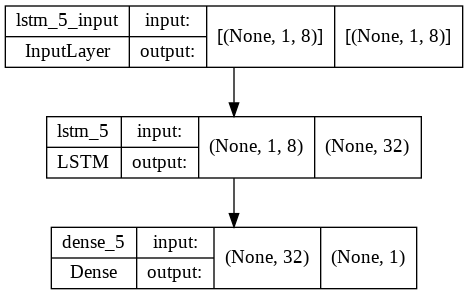

In [159]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [160]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
2619/2619 [==============================] - 7s 2ms/step - loss: 42616860.0000
Epoch 2/100
2619/2619 [==============================] - 6s 2ms/step - loss: 36973096.0000
Epoch 3/100
2619/2619 [==============================] - 5s 2ms/step - loss: 30480082.0000
Epoch 4/100
2619/2619 [==============================] - 6s 2ms/step - loss: 25105806.0000
Epoch 5/100
2619/2619 [==============================] - 5s 2ms/step - loss: 21628740.0000
Epoch 6/100
2619/2619 [==============================] - 5s 2ms/step - loss: 19818002.0000
Epoch 7/100
2619/2619 [==============================] - 5s 2ms/step - loss: 18726408.0000
Epoch 8/100
2619/2619 [==============================] - 6s 2ms/step - loss: 17622824.0000
Epoch 9/100
2619/2619 [==============================] - 6s 2ms/step - loss: 16547256.0000
Epoch 10/100
2619/2619 [==============================] - 5s 2ms/step - loss: 15455983.0000
Epoch 11/100
2619/2619 [==============================] - 5s 2ms/step - loss: 14391932.00

In [161]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

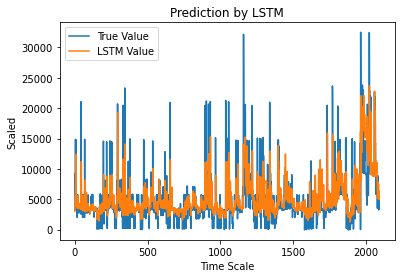

In [162]:
#Predicted plot
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Scaled")
plt.legend()
plt.show()